In [ ]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline

import lime

from lime.lime_text import LimeTextExplainer

import shap

import matplotlib.pyplot as plt

In [66]:
import pandas as pd

data = {
    "Nome": [
        "Ana Souza", "Bruno Lima", "Carla Mendes", "Diego Rocha", "Elisa Martins",
        "Felipe Duarte", "Giovana Castro", "Henrique Silva", "Isabela Ramos", "João Pereira",
        "Karen Oliveira", "Lucas Fernandes", "Mariana Costa", "Natália Azevedo", "Otávio Nogueira",
        "Paula Teixeira", "Rafael Almeida", "Sabrina Rocha", "Thiago Brito", "Vanessa Lima"
    ],
    "Idade": [28, 35, 42, 31, 26, 50, 23, 39, 33, 45, 29, 37, 41, 30, 27, 34, 38, 36, 44, 32],
    "Salário": [4500, 2800, 6500, 2200, 3100, 5200, 1800, 7200, 3500, 2900, 4000, 4600, 3700, 2500, 3200, 5800, 3000, 4900, 4100, 2700],
    "Valor_Solicitado": [10000, 7000, 15000, 5000, 8000, 12000, 3000, 20000, 9000, 10000, 9500, 11000, 7000, 6000, 7500, 14000, 8500, 10000, 11000, 6000],
    "Empregado": ["Sim", "Sim", "Sim", "Não", "Sim", "Sim", "Não", "Sim", "Sim", "Sim", "Sim", "Sim", "Sim", "Não", "Sim", "Sim", "Sim", "Sim", "Sim", "Não"],
    "Tempo_Emprego": [3.0, 1.5, 7.2, 0, 2.1, 10.5, 0, 8.3, 4.4, 3.2, 3.8, 5.0, 6.1, 0, 2.0, 6.7, 3.0, 5.5, 4.9, 0],
    "Historico_Credito": ["Bom", "Regular", "Bom", "Ruim", "Regular", "Bom", "Ruim", "Bom", "Regular", "Ruim", "Bom", "Regular", "Bom", "Ruim", "Regular", "Bom", "Regular", "Bom", "Regular", "Ruim"],
    "Aprovado": [
        "Sim", "Não", "Sim", "Não", "Sim", "Sim", "Não", "Sim", "Sim", "Não",
        "Sim", "Sim", "Sim", "Não", "Sim", "Sim", "Não", "Sim", "Sim", "Não"
    ]
}

df = pd.DataFrame(data)

# Salvando como CSV
df.to_csv("aprovacao_credito_ficticio.csv", index=False)

c:\Users\winic\OneDrive\Documentos\wini\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


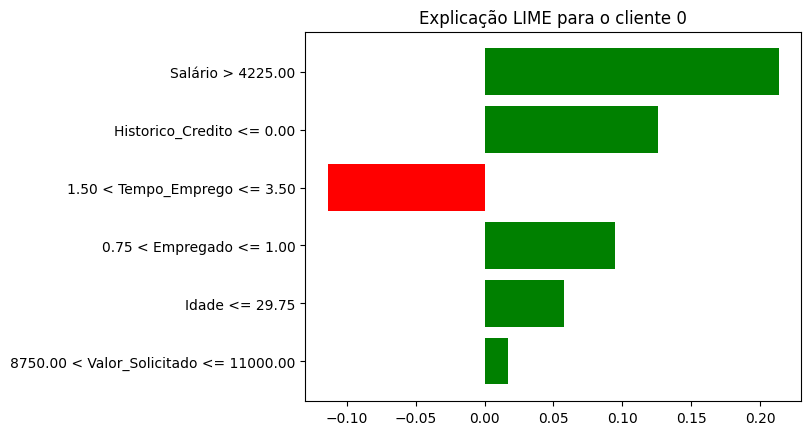

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

df = pd.read_csv("aprovacao_credito_ficticio.csv")

le_empregado = LabelEncoder()
df['Empregado'] = le_empregado.fit_transform(df['Empregado'])

le_credito = LabelEncoder()
df['Historico_Credito'] = le_credito.fit_transform(df['Historico_Credito'])

le_aprovado = LabelEncoder()
df['Aprovado'] = le_aprovado.fit_transform(df['Aprovado'])

X = df[['Idade', 'Salário', 'Valor_Solicitado', 'Empregado', 'Tempo_Emprego', 'Historico_Credito']]
y = df['Aprovado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['Não', 'Sim'],
    discretize_continuous=True
)

i = 0 
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=6)

fig = exp.as_pyplot_figure()
plt.title(f'Explicação LIME para o cliente {i}')
plt.show()
